In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

In [2]:
# define the path for the traning and test data
data_path = 'data/cell_images/cell_images'
os.listdir(data_path)

['test', 'train']

In [3]:
training_path = data_path+'\\train\\'
test_path = data_path+'\\test\\'
os.listdir(test_path)

['parasitized', 'uninfected']

In [4]:
#Choose name of a random infected cell from the training data
random_infected_cell = random.choice(os.listdir(training_path+'parasitized'))
random_infected_cell

'C48P9thinF_IMG_20150721_160944_cell_210.png'

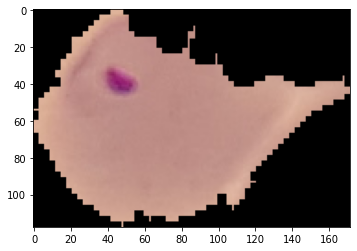

In [5]:
#Display the image using Matplotlib
infected_cell = training_path+'\\parasitized\\'+random_infected_cell
plt.imshow(imread(infected_cell))

In [8]:
#Choose name of a random uninfected cell from the training data
random_uninfected_cell = random.choice(os.listdir(training_path+'uninfected'))

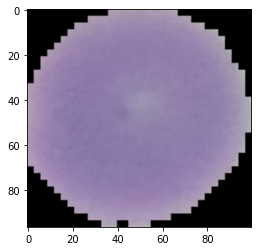

In [9]:
#Display the image using Matplotlib
healthy_cell =  training_path+'uninfected\\'+random_uninfected_cell
plt.imshow(imread(healthy_cell))

In [10]:
# Infected training size
len(os.listdir(training_path+'\\parasitized'))

12479

In [11]:
# Uninfected training size
len(os.listdir(training_path+'\\uninfected'))

12479

In [12]:
imread(infected_cell).shape

(118, 172, 3)

In [13]:
dim1=[]
dim2=[]
for image in os.listdir(test_path+'uninfected'):
    image = imread(test_path+'/uninfected/'+image)
    d1, d2, colors = image.shape
    dim1.append(d1)
    dim2.append(d2)
    

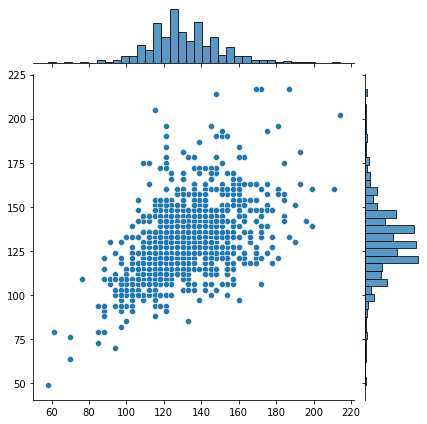

In [14]:
sns.jointplot(x=dim1, y=dim2)
plt.show()

In [15]:
np.mean(dim1)

130.92538461538462

In [16]:
np.mean(dim2)

130.75

In [25]:
image_shape = (130, 130, 3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_generator = ImageDataGenerator(rotation_range=20, #Rotate image by 20 degrees
                                     width_shift_range=0.1, #Shift the image width by max of 10%
                                     height_shift_range=0.1, #Shift the image height by max of 10%
                                     rescale=1/255, # Rescale the image by normalizing it
                                     shear_range=0.1, # Shear mean cutting away portion of the image (max 10%)
                                     zoom_range=0.1, # Zoom by max 10%
                                     horizontal_flip=True, # Allow image flipping
                                     fill_mode='nearest' # Fill in the missing pixels with the nearest filled value.
                                    )

In [21]:
image_generator.flow_from_directory(training_path)

Found 24958 images belonging to 2 classes.


In [22]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten

In [31]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd Convolutional Layer.
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd Convolutional Layer.
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 63, 63, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 64)        16448     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
__________________________________________________

In [33]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 63, 63, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 64)        16448     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)            

In [36]:
model.compile(loss='binary_crossentropy',
             optimizer='adam', 
             metrics=['accuracy']
             )

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 63, 63, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 64)        16448     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)            

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [39]:
batch_size = 16

In [43]:
train_image_gen = image_generator.flow_from_directory(
    training_path, 
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size, 
    class_mode='binary'
)

Found 24958 images belonging to 2 classes.


In [44]:
test_image_gen = image_generator.flow_from_directory(
    test_path, 
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size, 
    class_mode='binary'
)

Found 2600 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}